In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

Similar to the `odeint` I need to define the RHS for the ODE, initial state 
array, and an array for the values of the independent variable at which we want
to compute the solution.

The important difference with `odeint` is the function signature:

```
odeint:  f(y, x,...  )
ode: f(x, y, ...)
``` 

An example:

$\mathrm{m}_{1} \mathrm{x}_{1}^{\prime \prime}(\mathrm{t})+\gamma_{1} \mathrm{x}_{1}^{\prime}(\mathrm{t})+\mathrm{k}_{1} \mathrm{x}_{1}-\mathrm{k}_{2}\left(\mathrm{x}_{2}-\mathrm{x}_{1}\right)=0$


$\mathrm{~m}_{2} \mathrm{x}_{2}^{\prime \prime}(\mathrm{t})+\gamma_{2} \mathrm{x}_{2}^{\prime}(\mathrm{t})+\mathrm{k}_{2}\left(\mathrm{x}_{2}-\mathrm{x}_{1}\right)=0$

These equations describe the dynamics of two coupled springs, where $x_1(t)$ and
$x_2(t)$ are the displacements of two objects with masses $m_1$ and $m_2$.

Rewrite the equations:

$\frac{\mathrm{d}}{\mathrm{dt}}\left[\begin{array}{c}\mathrm{y}_{0}(\mathrm{t}) \\ \mathrm{y}_{1}(\mathrm{t}) \\ \mathrm{y}_{2}(\mathrm{t}) \\ \mathrm{y}_{3}(\mathrm{t})\end{array}\right]=\mathrm{f}(\mathrm{t}, \mathbf{y}(\mathrm{t}))=\left[\begin{array}{c}\mathrm{y}_{1}(\mathrm{t}) \\ \left(-\gamma_{1} \mathrm{y}_{1}(\mathrm{t})-\mathrm{k}_{1} \mathrm{y}_{0}(\mathrm{t})-\mathrm{k}_{2} \mathrm{y}_{0}(\mathrm{t})+\mathrm{k}_{2} \mathrm{y}_{2}(\mathrm{t})\right) / \mathrm{m}_{1} \\ \mathrm{y}_{3}(\mathrm{t}) \\ \left(-\gamma_{2} \mathrm{y}_{3}(\mathrm{t})-\mathrm{k}_{2} \mathrm{y}_{2}(\mathrm{t})+\mathrm{k}_{2} \mathrm{y}_{0}(\mathrm{t})\right) / \mathrm{m}_{2}\end{array}\right]$

where:

$y_{0}(t)=x_{1}(t), y_{1}(t)=x_{1}^{\prime}(t), y_{2}(t)=x_{2}(t)$, and $y_{3}(t)=x_{2}^{\prime}(t)$



In [3]:
def f(t,y,args):
    m1, k1, g1, m2, k2, g2 = args
    return [y[1], -k1/m1*y[0] + k2/m1*(y[2] - y[0])-g1/m1*y[1], y[3],
            - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]

In [4]:
m1, k1, g1, = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

In [5]:
# here is the difference between odeint and ode we call an instance
r = integrate.ode(f)

# set the properties
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);

In [6]:
# now we can do the integration
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t+dt)
    idx += 1

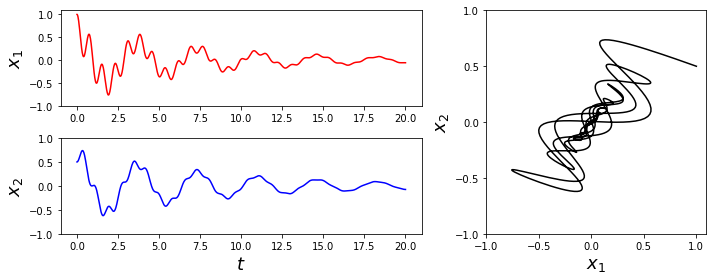

In [8]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
# x_1 vs time plot
ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])
# x2 vs time plot
ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])
# x1 and x2 phase space plot
ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])
fig.tight_layout()